In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("StudentsPerformance.csv")

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
print('Catagory in gender: ',end = " ")
print(df['gender'].unique())

Catagory in gender:  ['female' 'male']


In [13]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
catagorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [14]:
print('We have {} numerical feature : {}'.format(len(numeric_feature),numeric_feature))
print('We have {} catagorical feature : {}'.format(len(catagorical_features),catagorical_features))

We have 3 numerical feature : ['math score', 'reading score', 'writing score']
We have 5 catagorical feature : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [15]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_score_20 = df[df['writing score'] <= 20]['average'].count()
math_score_20 = df[df['math score'] <=20]['average'].count()

In [17]:
print(math_score_20)
print(reading_less_20)
print(writing_score_20)


4
1
3


In [18]:
math_full = df[df['math score'] == 100]['average'].count()
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()

In [19]:
print(math_full)
print(reading_full)
print(writing_full)

7
17
14


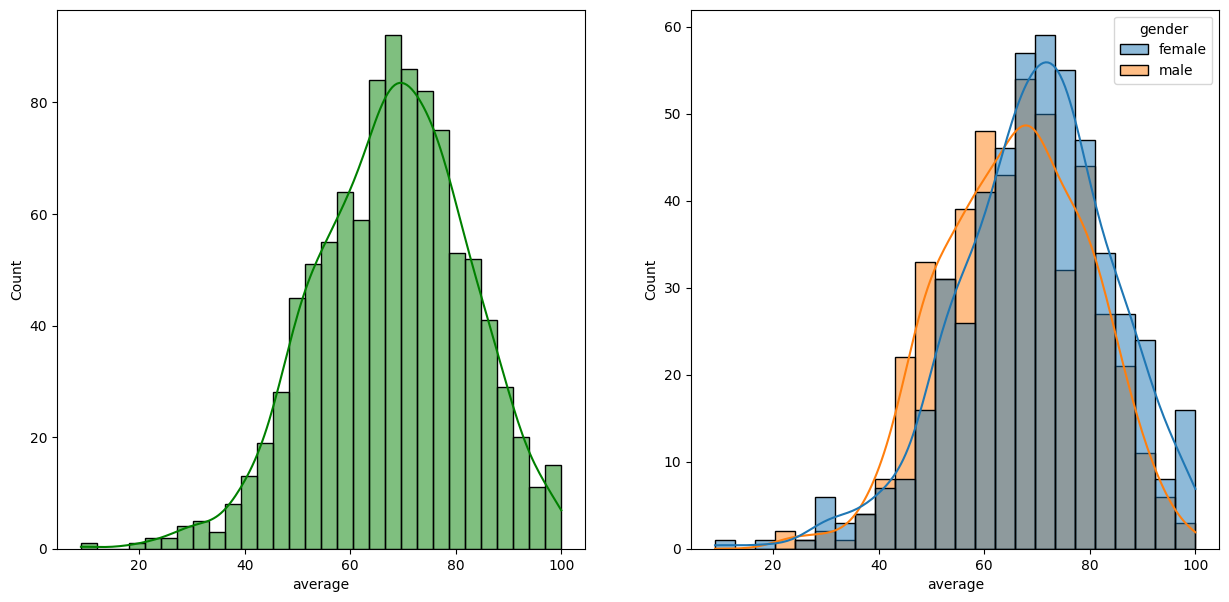

In [20]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data = df,bins = 30,x = 'average',kde = True,color = 'g')
plt.subplot(1,2,2)
sns.histplot(data = df,x = 'average',kde = True,hue = 'gender')
plt.show()

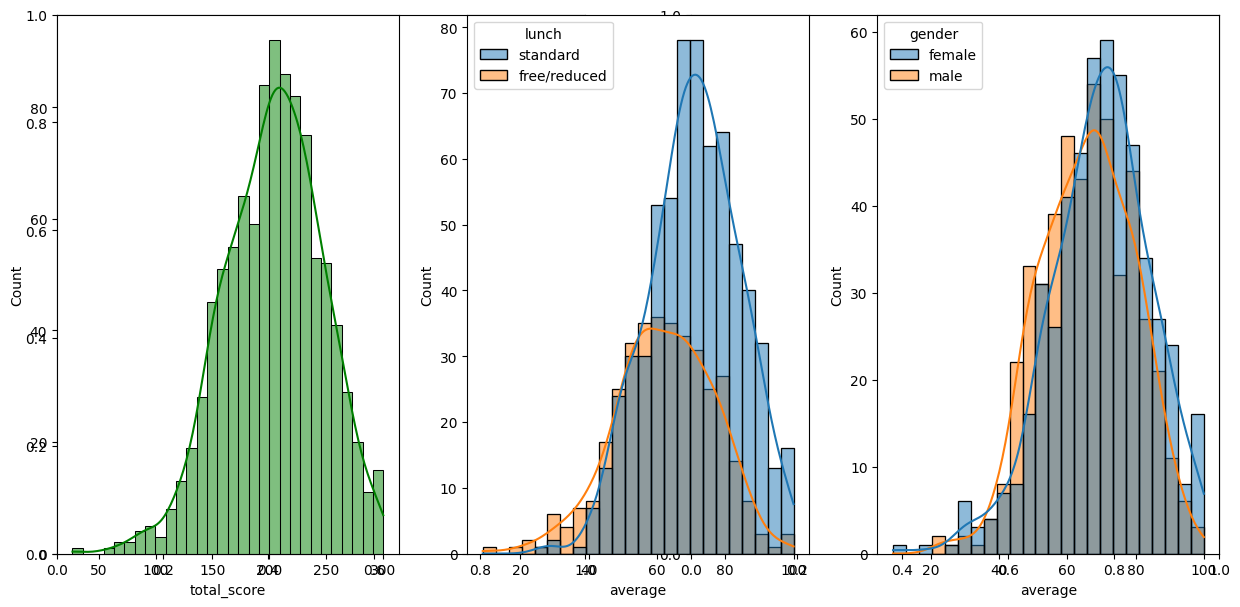

In [23]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,3,1)
sns.histplot(data = df,bins = 30,x = 'total_score',kde = True,color = 'g')
plt.subplot(1,3,2)
sns.histplot(data = df,x = 'average',kde = True,hue = 'lunch')
plt.subplot(1,3,3)
sns.histplot(data = df,x = 'average',kde = True,hue = 'gender')
plt.show()

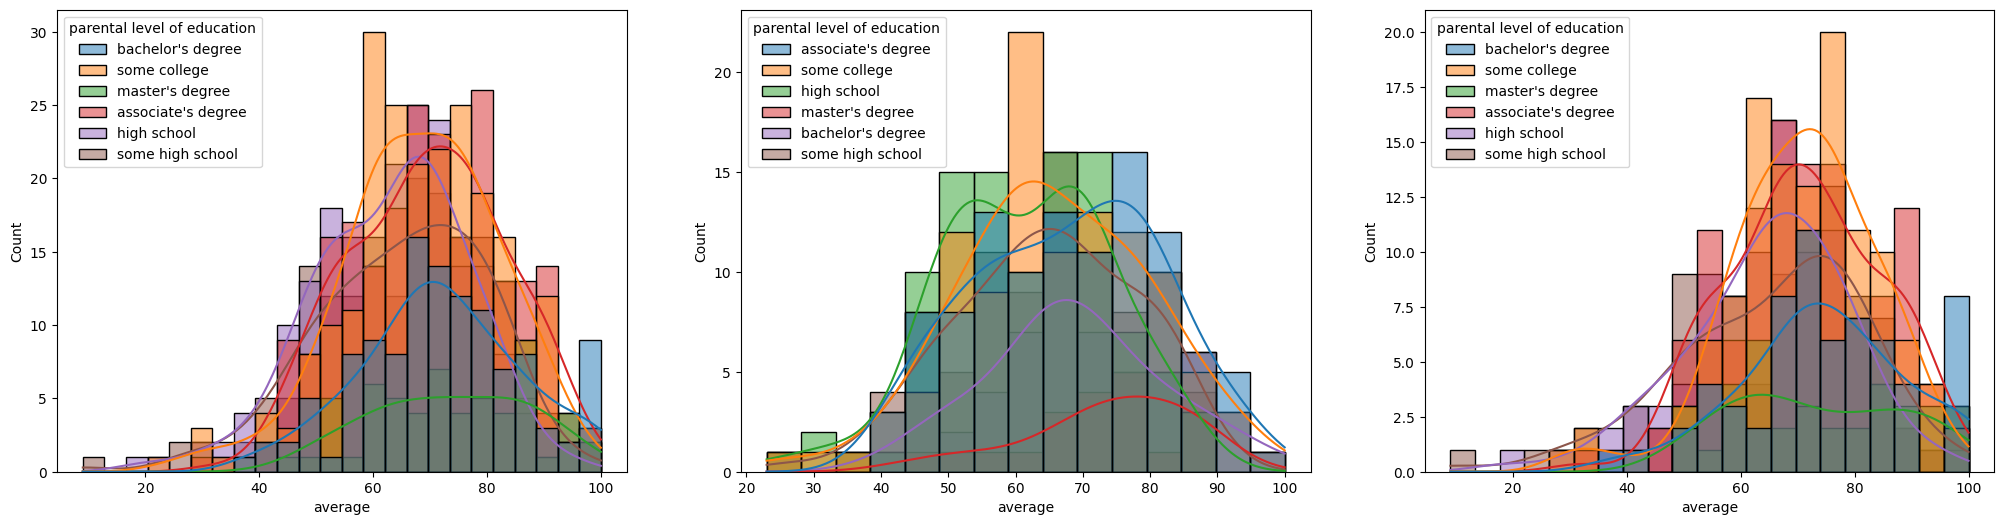

In [29]:
fig,axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data = df,x = 'average',hue = 'parental level of education',kde = True)
plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'] , x = 'average',kde = True,hue = 'parental level of education')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'],x = 'average',kde = True,hue = 'parental level of education')
plt.show()

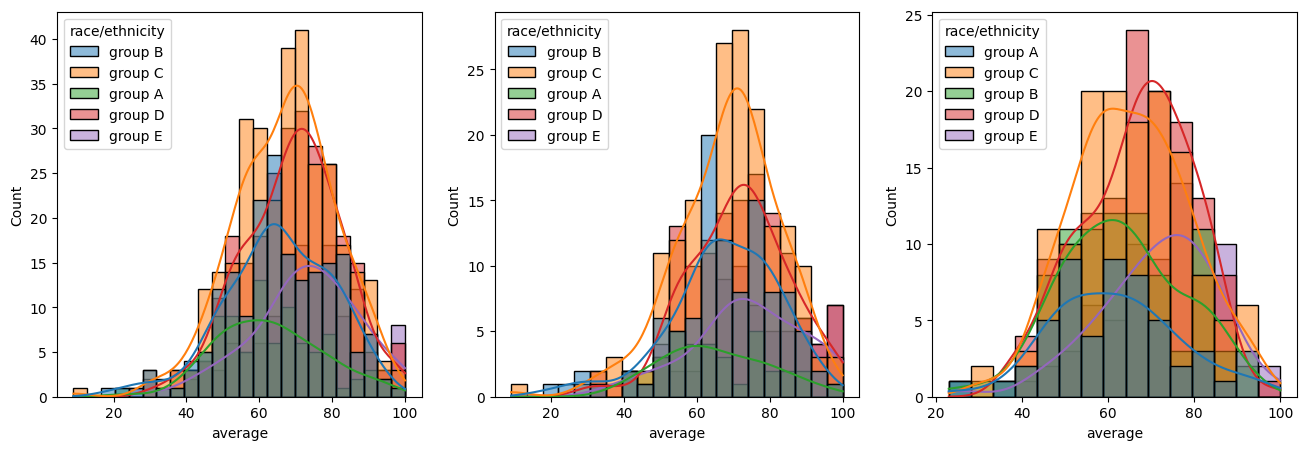

In [31]:
plt.subplots(1,3,figsize = (16,5))
plt.subplot(131)
sns.histplot(data=df,x='average',kde = True,hue = 'race/ethnicity')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'],x = 'average',hue = 'race/ethnicity',kde = True)
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'],x = 'average',hue = 'race/ethnicity',kde = True)
plt.show()

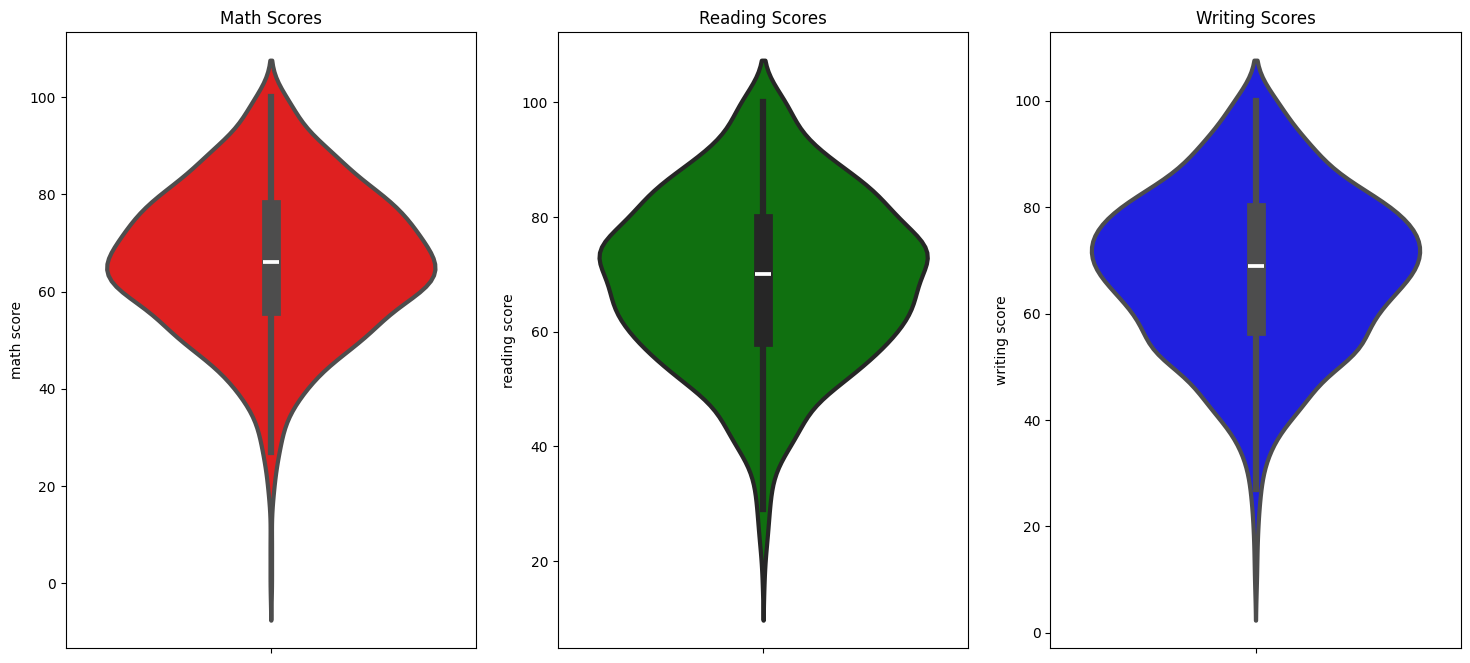

In [33]:
plt.figure(figsize = (18,8))
plt.subplot(131)
plt.title('Math Scores')
sns.violinplot(y = 'math score',data = df,color='red',linewidth=3)
plt.subplot(132)
plt.title("Reading Scores")
sns.violinplot(y = 'reading score',data = df,color = 'green',linewidth = 3)
plt.subplot(133)
plt.title('Writing Scores')
sns.violinplot(y = 'writing score',data = df,color = 'blue',linewidth = 3)
plt.show()

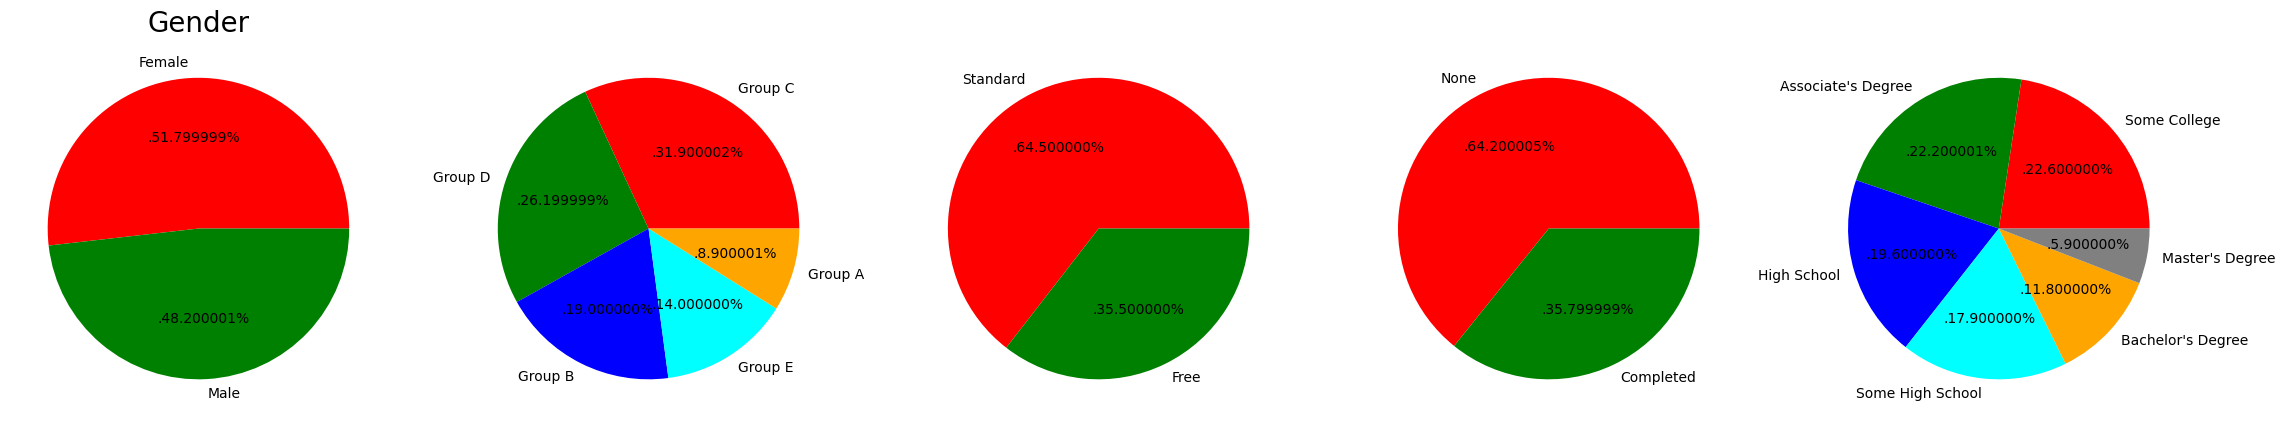

In [59]:
plt.figure(figsize = (23,16))
plt.subplot(1,5,1)
plt.pie(df['gender'].value_counts(),colors = ['red','green'],labels = ['Female','Male'],autopct = '.%2f%%')
plt.title('Gender',fontsize = 20)

plt.subplot(152)
plt.pie(df['race/ethnicity'].value_counts(),colors = ['red','green','blue','cyan','orange'],labels = ['Group C', 'Group D','Group B','Group E','Group A'],autopct = '.%2f%%')

plt.subplot(153)
plt.pie(df['lunch'].value_counts(),colors= ['red','green'],labels = ['Standard','Free'],autopct = '.%2f%%')

plt.subplot(154)
plt.pie(df['test preparation course'].value_counts(),labels = ['None','Completed'],colors = ['red','green'],autopct =  '.%2f%%')

plt.subplot(155)
plt.pie(df['parental level of education'].value_counts(),colors = ['red', 'green', 'blue', 'cyan','orange','grey'],labels = ['Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"],autopct='.%2f%%')

plt.tight_layout()
plt.grid()
plt.show()

### MultiVariate analysis

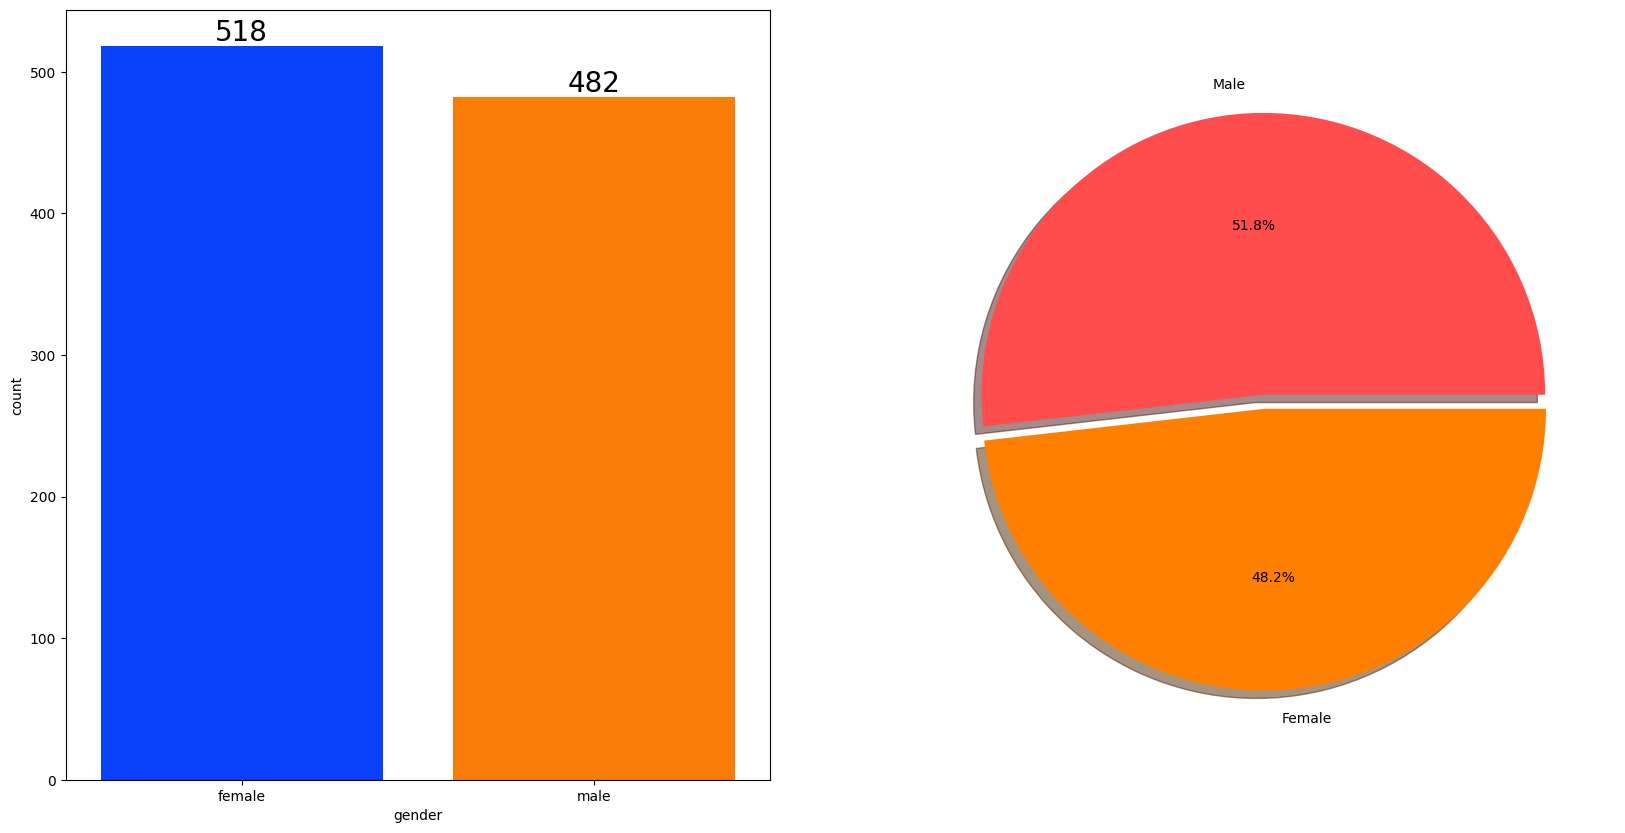

In [64]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.05],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

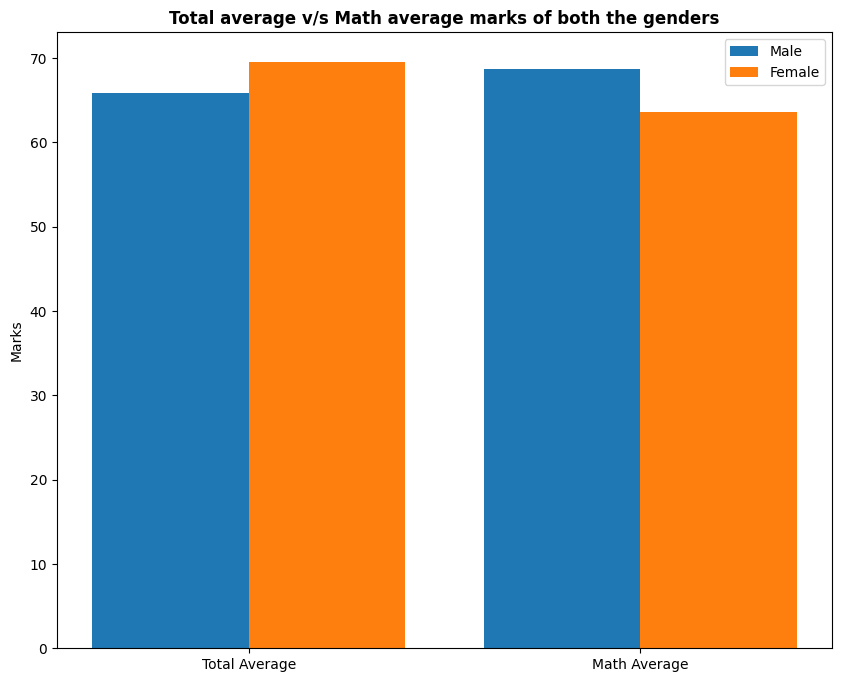

In [73]:
gender_group = df.groupby('gender').mean(numeric_only=True)

plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

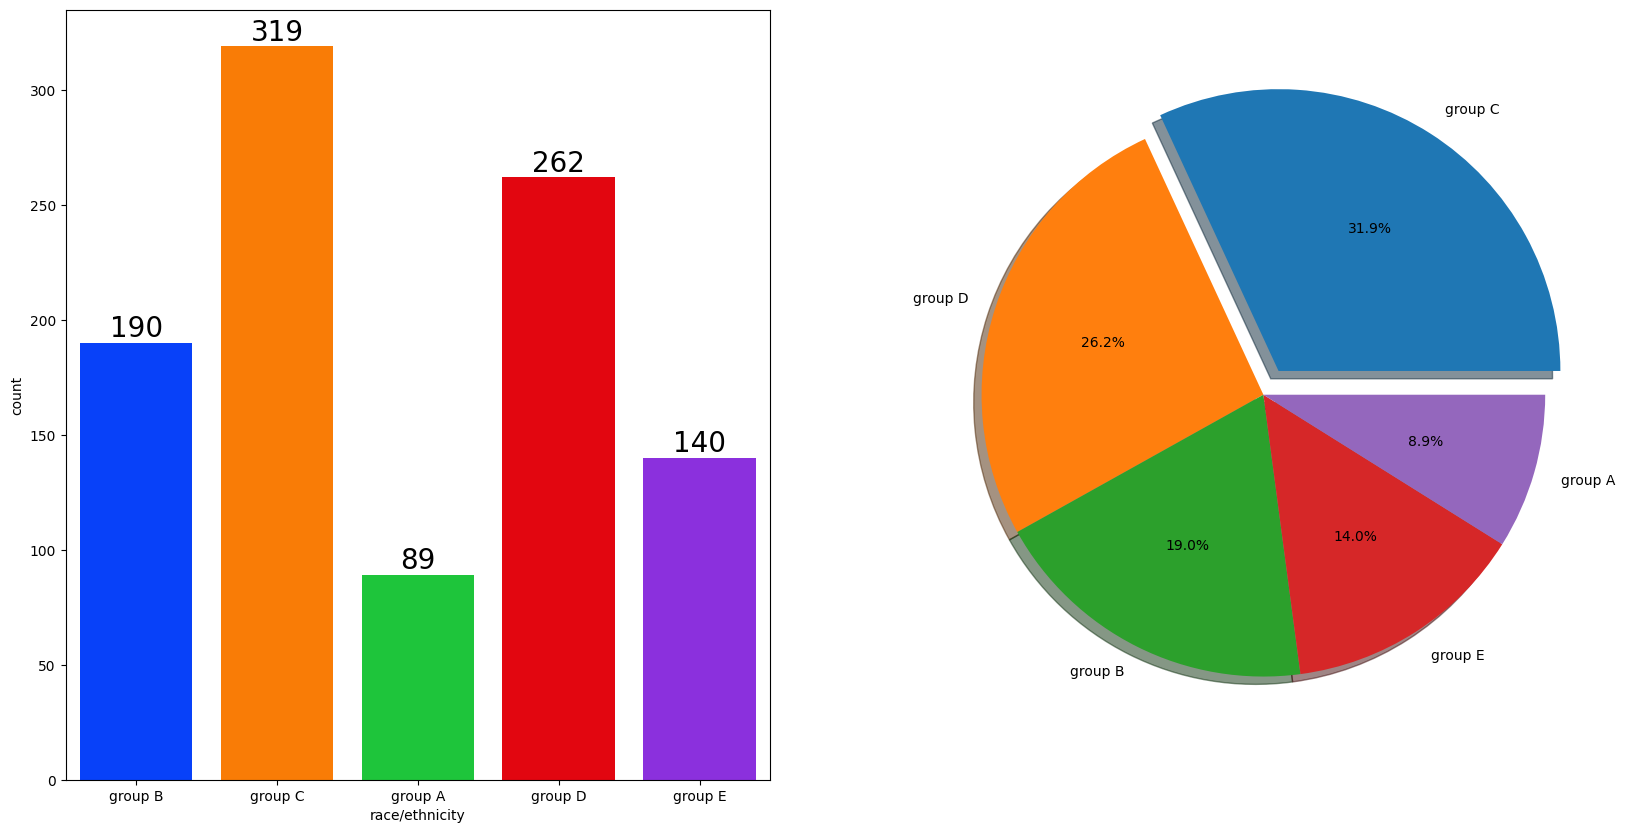

In [74]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

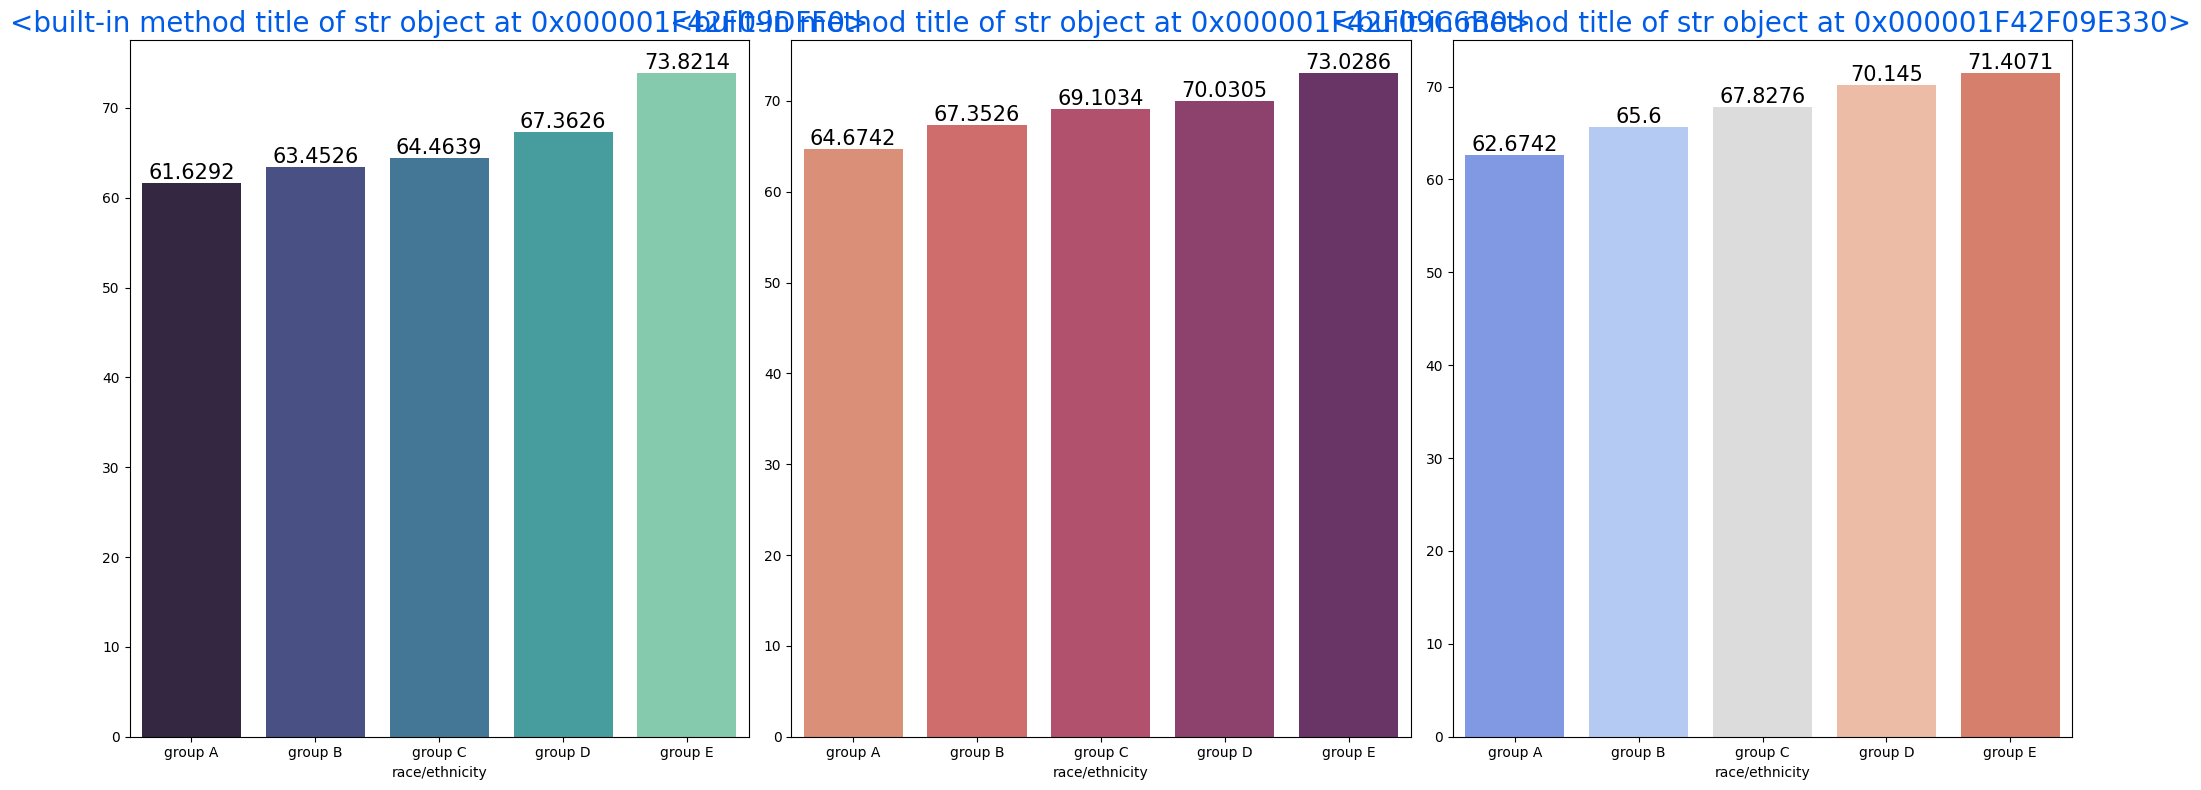

In [82]:
dta = df.groupby('race/ethnicity').mean(numeric_only = True)
cols = ['math score','reading score','writing score']
palette = ['mako','flare','coolwarm']
fig,ax = plt.subplots(1,3,figsize = (20,8))
for i,(col,pal) in enumerate(zip(cols,palette)):
    sns.barplot(
        x = dta.index,
        y = dta[col].values,
        palette = pal,
        ax = ax[i],
    )
    ax[i].set_title(f"{col.title}",color = '#005ce6',size = 20)
    for container in ax[i].containers:
        ax[i].bar_label(container,color='black',size = 15)

    plt.tight_layout()
plt.show()

In [83]:
print(dta)

                math score  reading score  writing score  total_score  \
race/ethnicity                                                          
group A          61.629213      64.674157      62.674157   188.977528   
group B          63.452632      67.352632      65.600000   196.405263   
group C          64.463950      69.103448      67.827586   201.394984   
group D          67.362595      70.030534      70.145038   207.538168   
group E          73.821429      73.028571      71.407143   218.257143   

                  average  
race/ethnicity             
group A         62.992509  
group B         65.468421  
group C         67.131661  
group D         69.179389  
group E         72.752381  


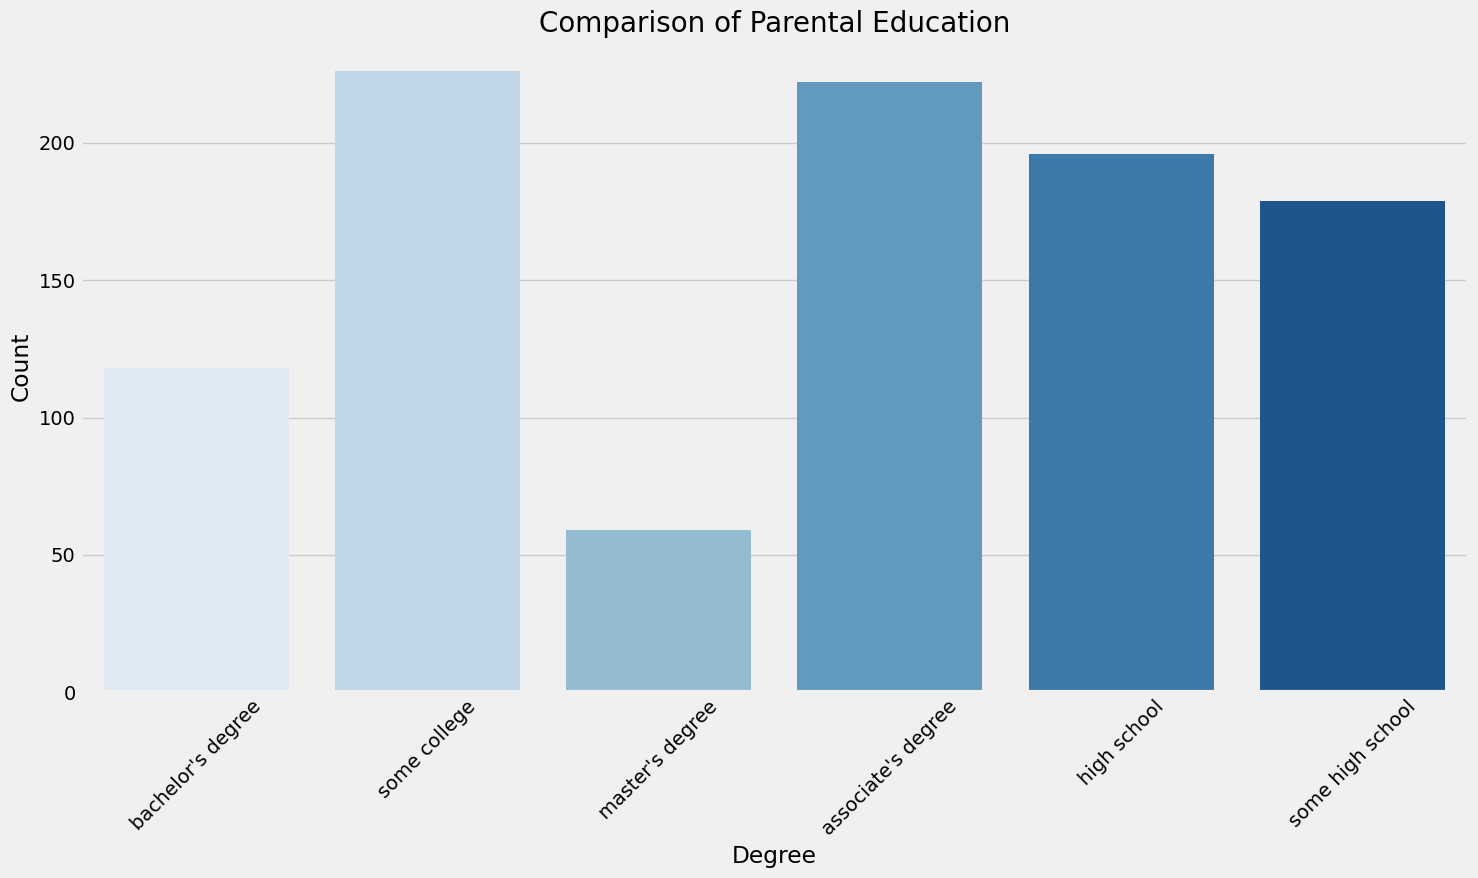

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 9))
plt.subplot(1, 1, 1)
sns.countplot(x='parental level of education', data=df, palette='Blues')
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
dpa = df.groupby('parental level of education').mean(numeric_only=True)
print(dpa)
cols = ['math score','reading score','writing score']
palette = ['mako','flare','coolwarm']


                             math score  reading score  writing score  \
parental level of education                                             
associate's degree            67.882883      70.927928      69.896396   
bachelor's degree             69.389831      73.000000      73.381356   
high school                   62.137755      64.704082      62.448980   
master's degree               69.745763      75.372881      75.677966   
some college                  67.128319      69.460177      68.840708   
some high school              63.497207      66.938547      64.888268   

                             total_score    average  
parental level of education                          
associate's degree            208.707207  69.569069  
bachelor's degree             215.771186  71.923729  
high school                   189.290816  63.096939  
master's degree               220.796610  73.598870  
some college                  205.429204  68.476401  
some high school              195.324

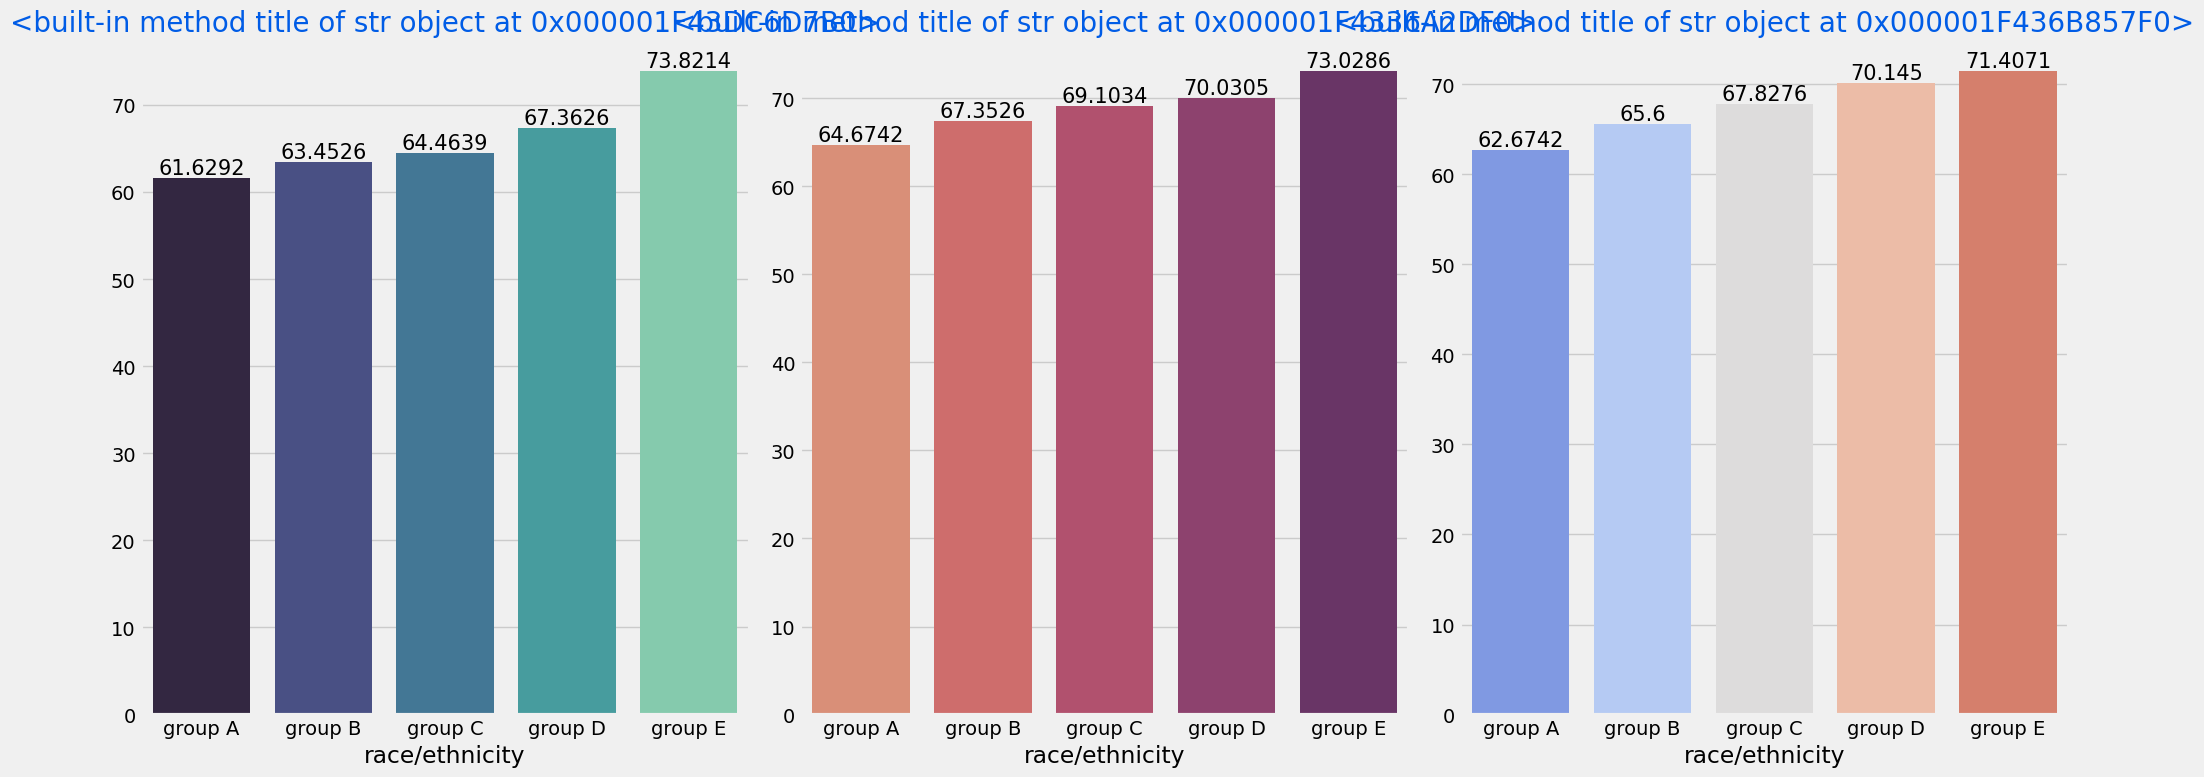

In [90]:
dta = df.groupby('race/ethnicity').mean(numeric_only = True)
cols = ['math score','reading score','writing score']
palette = ['mako','flare','coolwarm']
fig,ax = plt.subplots(1,3,figsize = (20,8))
for i,(col,pal) in enumerate(zip(cols,palette)):
    sns.barplot(
        x = dta.index,
        y = dta[col].values,
        palette = pal,
        ax = ax[i],
    )
    ax[i].set_title(f"{col.title}",color = '#005ce6',size = 20)
    for container in ax[i].containers:
        ax[i].bar_label(container,color='black',size = 15)

    plt.tight_layout()
plt.show()

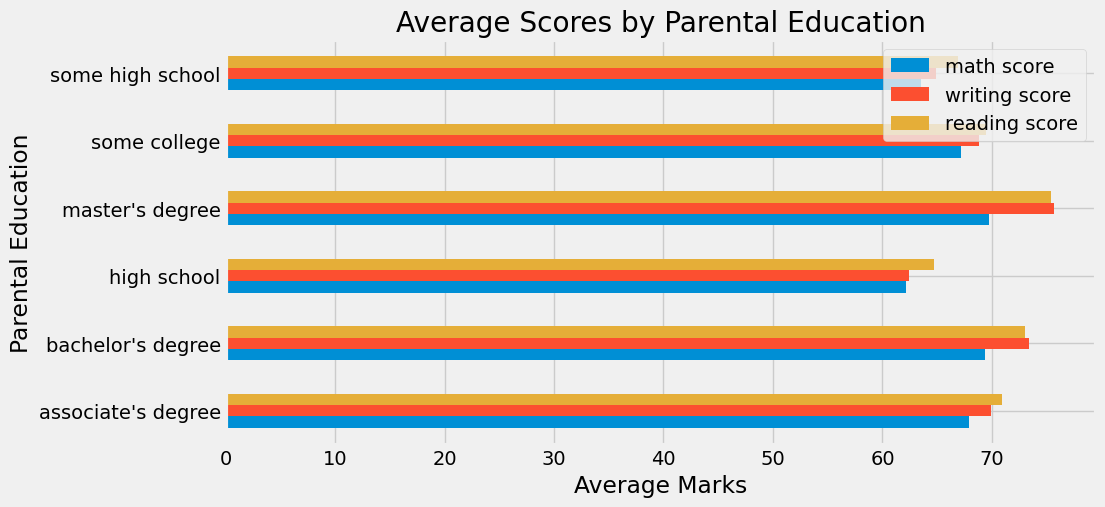

In [96]:
df.groupby('parental level of education')[['math score','writing score','reading score']].mean().plot.barh(figsize = (10,5))
plt.title("Average Scores by Parental Education")
plt.xlabel("Average Marks")
plt.ylabel("Parental Education")
plt.show()

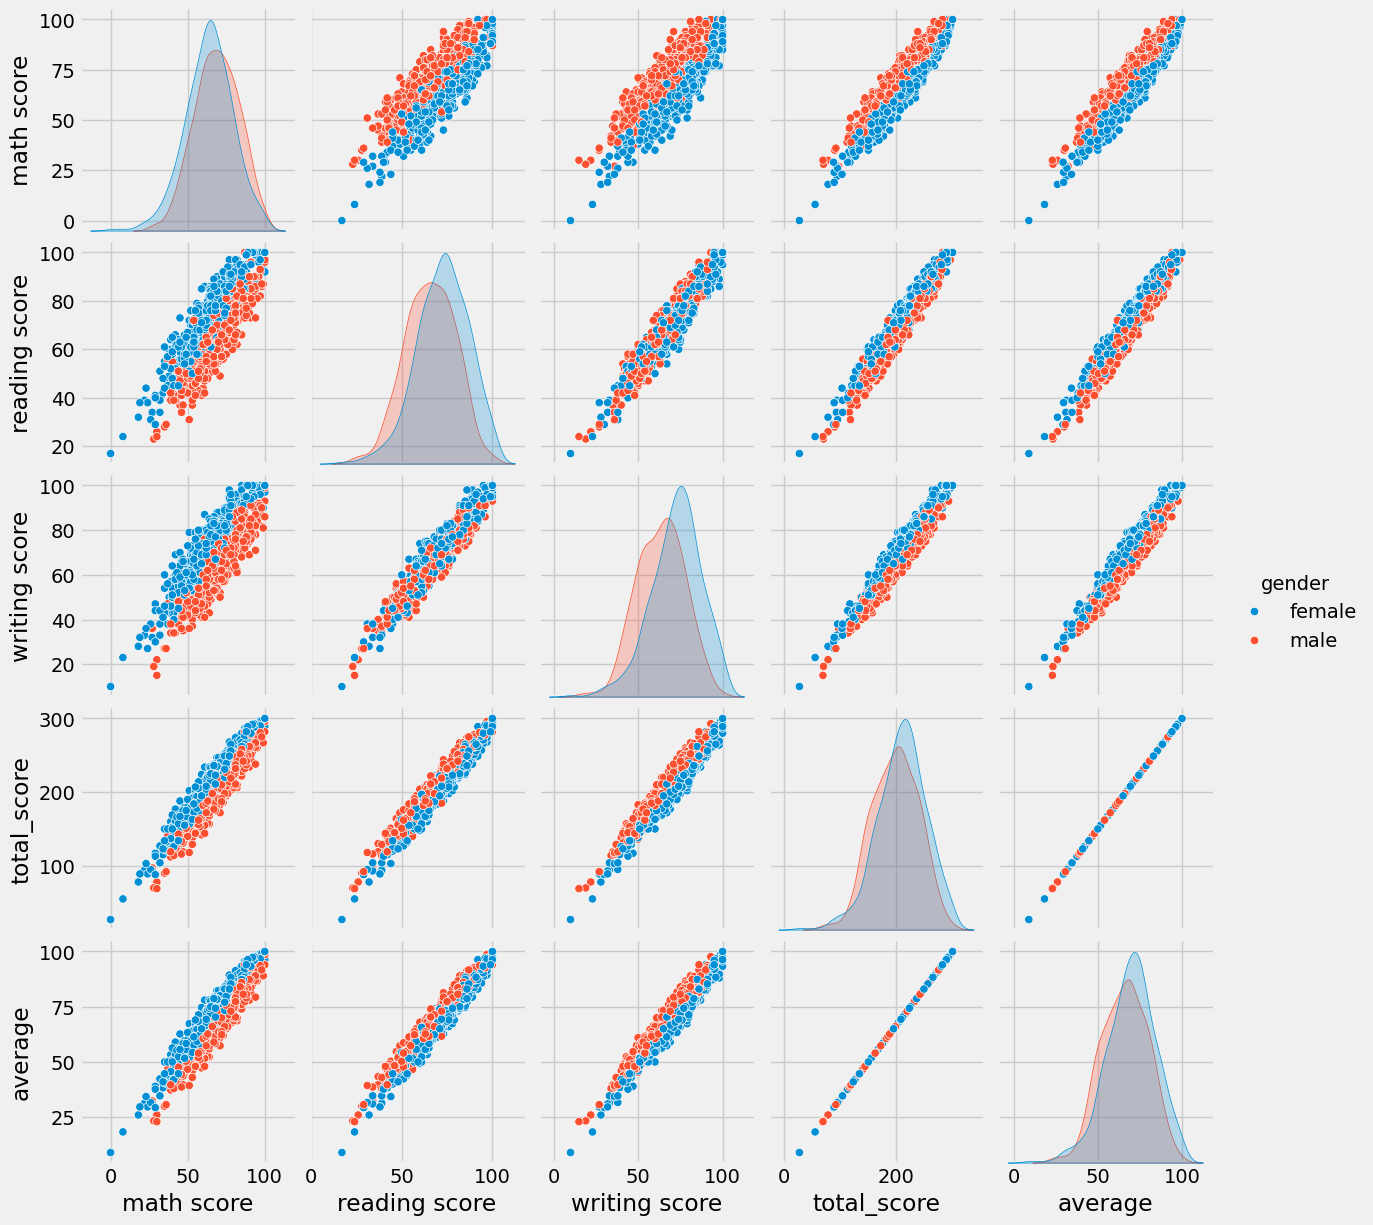

In [97]:
sns.pairplot(df,hue = 'gender')
plt.show()

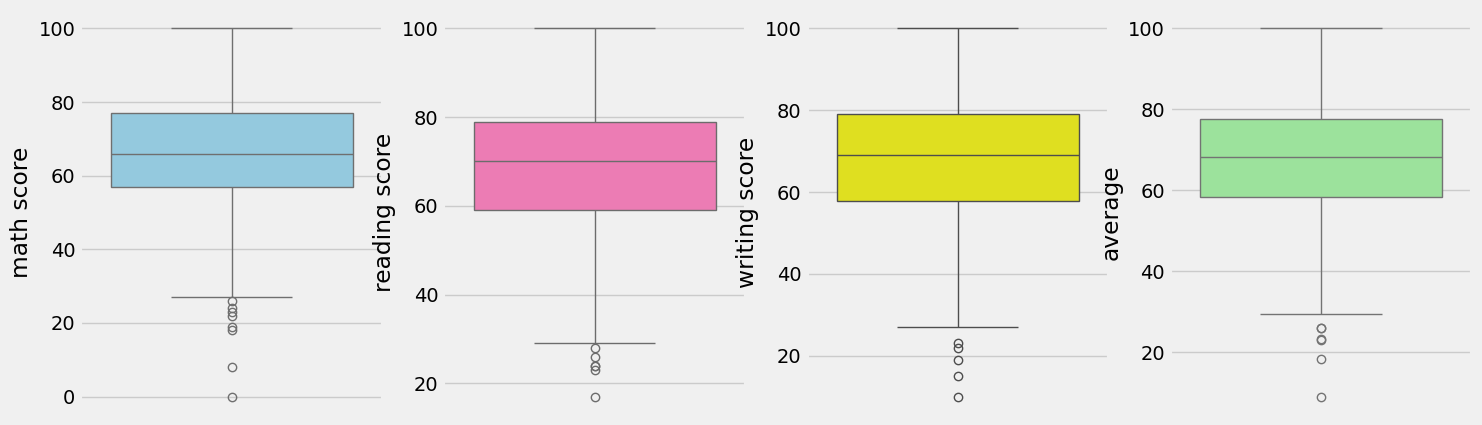

In [98]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

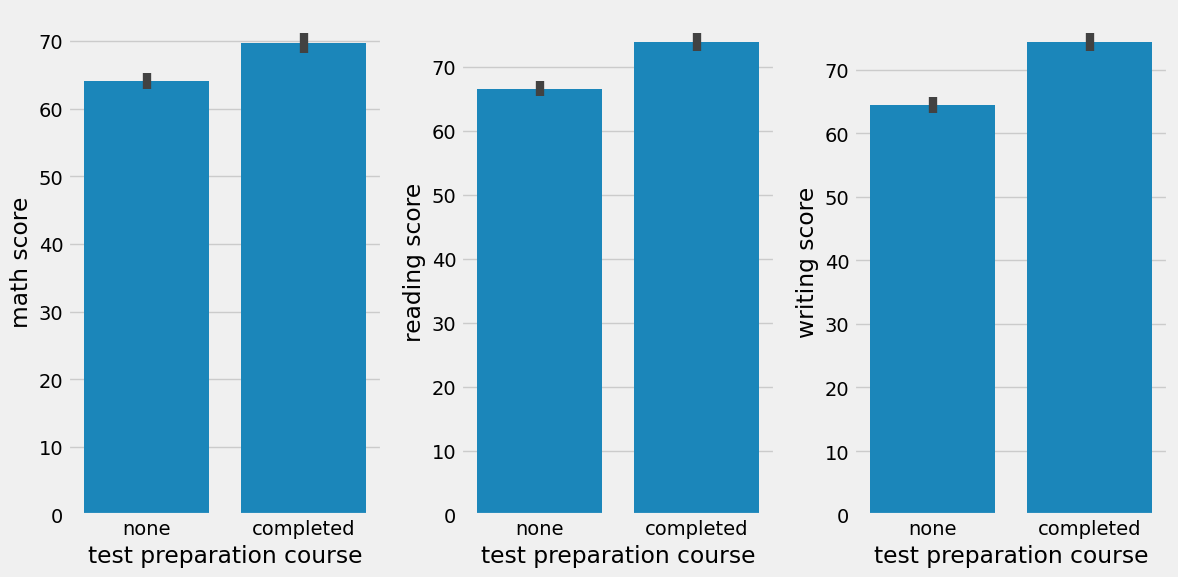

In [99]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.barplot(x='test preparation course', y='math score', data=df)
plt.subplot(1,3,2)
sns.barplot(x='test preparation course', y='reading score', data=df)
plt.subplot(1,3,3)
sns.barplot(x='test preparation course', y='writing score', data=df)

plt.tight_layout()
plt.show()


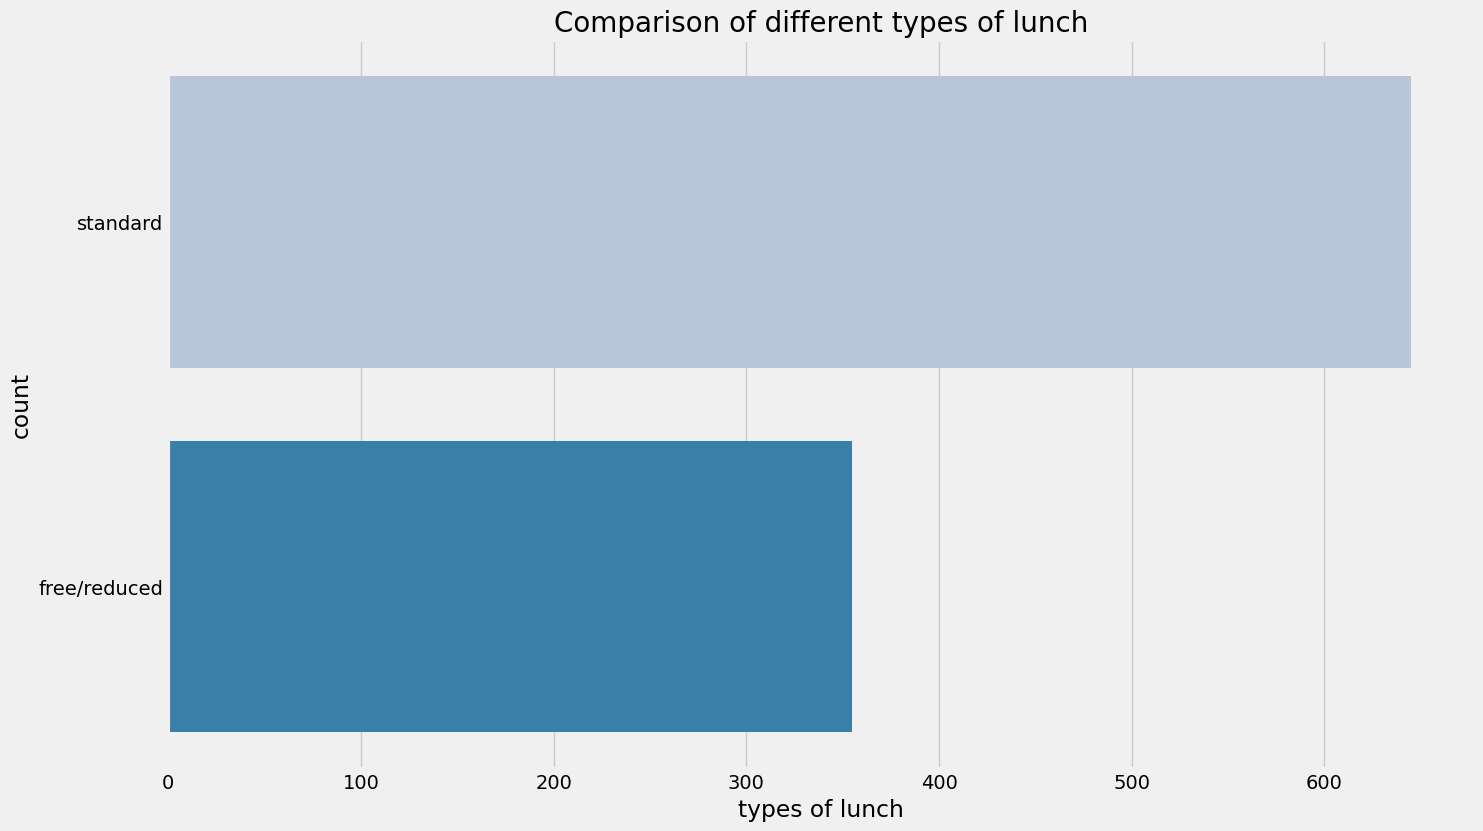

In [102]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()